# Clusters par titres
## 1. Pre-processing

In [2]:
import joblib
import numpy as np
import pandas as pd
import scipy
import sklearn

data_folder = "data"
df_hover = joblib.load(data_folder + "/df_hover.pkl")

for title in df_hover['Title']:
    print(title)

Integrating Enhanced HIV Pre-exposure Prophylaxis Into a Sexually Transmitted Infection Clinic in Lilongwe: Protocol for a Prospective Cohort Study.
Subtle Longitudinal Alterations in Env Sequence Potentiate Differences in Sensitivity to Broadly Neutralizing Antibodies following Acute HIV-1 Subtype C Infection.
Evaluation of multi-assay algorithms for cross-sectional HIV incidence estimation in settings with universal antiretroviral treatment.
Blood Center Testing Allows the Detection and Rapid Treatment of Acute and Recent HIV Infection.
Determinants of therapy failure among adults on first-line antiretroviral therapy in Asmara, Eritrea: a multicenter retrospective matched case-control study.
Maternal retention and early infant HIV diagnosis in a prospective cohort study of HIV-positive women and their children in Malawi.
Tuberculosis prevalence, incidence and prevention in a south african cohort of children living with HIV.
Testing strategies to detect acute and prevalent HIV infecti

In [3]:
import nltk
import re

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

stopwords = set(nltk.corpus.stopwords.words('english'))
# stemmer = nltk.stem.snowball.SnowballStemmer('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

def penn_to_wn(tag):
    if tag in ['JJ', 'JJR', 'JJS']:
        return nltk.corpus.wordnet.ADJ
    elif tag in ['NN', 'NNS', 'NNP', 'NNPS']:
        return nltk.corpus.wordnet.NOUN
    elif tag in ['RB', 'RBR', 'RBS']:
        return nltk.corpus.wordnet.ADV
    elif tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
        return nltk.corpus.wordnet.VERB
    else:
        return nltk.corpus.wordnet.NOUN

def lemmatization(word):
    new_form = lemmatizer.lemmatize(word, pos = penn_to_wn(nltk.pos_tag([word])[0][1]))
    nouns = set()
    for lemma in nltk.corpus.wordnet.lemmas(new_form):
        if nltk.pos_tag([lemma.name()])[0][1] == "NN" and (bool(re.search(r'ion$', lemma.name())) or bool(re.search(r'ment$', lemma.name())) or bool(re.search(r'ion$', lemma.name())) or bool(re.search(r'y$', lemma.name())) or bool(re.search(r'x$', lemma.name())) or bool(re.search(r'k$', lemma.name())) or bool(re.search(r'lt$', lemma.name())) or bool(re.search(r'ence$', lemma.name())) or bool(re.search(r'ness$', lemma.name())) or bool(re.search(r'ant$', lemma.name())) or bool(re.search(r'ure$', lemma.name())) or bool(re.search(r'ude$', lemma.name())) or bool(re.search(r'is$', lemma.name())) or bool(re.search(r'ood$', lemma.name())) or bool(re.search(r'end$', lemma.name())) or bool(re.search(r'age$', lemma.name()))) and not (bool(re.search(r'hood$', lemma.name())) or bool(re.search(r'oody$', lemma.name())) or bool(re.search(r'ist$', lemma.name())) or bool(re.search(r'r$', lemma.name()))):
            nouns.add(lemma.name())
        for related_lemma in lemma.derivationally_related_forms():
            if nltk.pos_tag([related_lemma.name()])[0][1] == "NN" and (bool(re.search(r'ion$', related_lemma.name())) or bool(re.search(r'ment$', related_lemma.name())) or bool(re.search(r'ion$', related_lemma.name())) or bool(re.search(r'y$', related_lemma.name())) or bool(re.search(r'x$', related_lemma.name())) or bool(re.search(r'k$', related_lemma.name())) or bool(re.search(r'lt$', related_lemma.name())) or bool(re.search(r'ence$', related_lemma.name())) or bool(re.search(r'ness$', related_lemma.name())) or bool(re.search(r'ant$', related_lemma.name())) or bool(re.search(r'ure$', related_lemma.name())) or bool(re.search(r'ude$', related_lemma.name())) or bool(re.search(r'is$', related_lemma.name())) or bool(re.search(r'ood$', related_lemma.name())) or bool(re.search(r'end$', related_lemma.name())) or bool(re.search(r'age$', related_lemma.name()))) and not (bool(re.search(r'hood$', related_lemma.name())) or bool(re.search(r'ist$', related_lemma.name())) or bool(re.search(r'oody$', related_lemma.name())) or bool(re.search(r'r$', related_lemma.name()))):
                nouns.add(related_lemma.name())
    nouns_list = list(nouns)
    if len(nouns_list) == 0:
        return new_form
    else:
        return lemmatizer.lemmatize(nouns_list[0], pos = penn_to_wn(nltk.pos_tag([nouns_list[0]])[0][1]))

bag_of_tokens = []

for title in df_hover['Title']:
    keywords = []
    keywords.extend([lemmatization(word) for word in nltk.word_tokenize(title.strip().lower(), "english") if word.isalpha() and word not in stopwords])
    bag_of_tokens.append(" ".join(keywords))

bag_of_tokens

['integration enhancement hiv prophylaxis sexually transmission infection clinic lilongwe protocol prospective cohort study',
 'subtle longitude alteration env sequence potentiation difference sensitivity broadly neutralization antibody follow acuteness subtype c infection',
 'evaluation algorithm hiv incidence estimation setting universality antiretroviral treatment',
 'blood center test allows detection rapidness treatment acuteness recentness hiv infection',
 'determinant therapy failure among adult antiretroviral therapy asmara eritrea multicenter retrospective match study',
 'maternity retention earliness infant hiv diagnosis prospective cohort study woman child malawi',
 'tuberculosis prevalence incidence prevention south african cohort child living hiv',
 'test strategy detection acuteness prevalence hiv infection adult outpatient seek healthcare symptom compatibility acuteness hiv infection kenya analysis',
 'prevalence drug resistant formation patience without history antiretr

## 2. Calcul du TF-IDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# créer un vecteur tf_idf
tf_idf = TfidfVectorizer()
 
# valeurs tf_idf
result = tf_idf.fit_transform(bag_of_tokens)

In [5]:
# valeurs idf
print('idf values:')
for ele1, ele2 in zip(tf_idf.get_feature_names_out(), tf_idf.idf_):
    print(ele1, ':', ele2)

idf values:
ababa : 6.755742213586912
abidjan : 6.062595033026967
abroad : 6.755742213586912
absence : 6.755742213586912
absoluteness : 6.755742213586912
abuse : 6.755742213586912
academy : 6.755742213586912
acceptability : 6.062595033026967
accessibility : 6.755742213586912
accession : 6.350277105478748
accra : 6.755742213586912
accuracy : 6.350277105478748
accurate : 6.755742213586912
acetate : 6.755742213586912
achievement : 6.755742213586912
acidity : 5.251664816810639
acquisition : 5.3694478524670215
across : 6.062595033026967
action : 6.350277105478748
activation : 5.3694478524670215
activeness : 5.839451481712757
activity : 6.755742213586912
acutely : 6.062595033026967
acuteness : 2.8044984950054848
ada : 6.755742213586912
adaptation : 6.755742213586912
adapts : 6.755742213586912
adcc : 6.755742213586912
addis : 6.755742213586912
adherence : 5.657129924918802
adjustment : 6.062595033026967
adjuvant : 6.755742213586912
admission : 6.755742213586912
adolescence : 6.350277105478748

In [6]:
# les indexes des mots
print('Word indexes:')
print(tf_idf.vocabulary_)

Word indexes:
{'integration': 663, 'enhancement': 419, 'hiv': 582, 'prophylaxis': 1093, 'sexually': 1252, 'transmission': 1408, 'infection': 641, 'clinic': 214, 'lilongwe': 734, 'protocol': 1101, 'prospective': 1097, 'cohort': 224, 'study': 1319, 'subtle': 1327, 'longitude': 746, 'alteration': 55, 'env': 422, 'sequence': 1235, 'potentiation': 1045, 'difference': 358, 'sensitivity': 1234, 'broadly': 158, 'neutralization': 904, 'antibody': 76, 'follow': 501, 'acuteness': 23, 'subtype': 1328, 'evaluation': 441, 'algorithm': 52, 'incidence': 628, 'estimation': 436, 'setting': 1247, 'universality': 1440, 'antiretroviral': 79, 'treatment': 1412, 'blood': 144, 'center': 184, 'test': 1377, 'allows': 54, 'detection': 348, 'rapidness': 1125, 'recentness': 1139, 'determinant': 350, 'therapy': 1380, 'failure': 465, 'among': 60, 'adult': 35, 'asmara': 94, 'eritrea': 431, 'multicenter': 861, 'retrospective': 1187, 'match': 791, 'maternity': 792, 'retention': 1185, 'earliness': 392, 'infant': 640, 'd

In [7]:
# afficher les valeurs tf-idf
print('tf-idf value:')
print(result)

tf-idf value:
  (0, 1319)	0.1950836305165142
  (0, 224)	0.2281698065098795
  (0, 1097)	0.2837733507379278
  (0, 1101)	0.3432933053253233
  (0, 734)	0.3339389335681987
  (0, 214)	0.3065109852716327
  (0, 641)	0.11434972619065008
  (0, 1408)	0.20356484622013696
  (0, 1252)	0.31868834503558086
  (0, 1093)	0.3122947213870176
  (0, 582)	0.09993149771180959
  (0, 419)	0.3065109852716327
  (0, 663)	0.3853557627638924
  (1, 1328)	0.19142503237016442
  (1, 23)	0.14085764951476848
  (1, 501)	0.22895433199818327
  (1, 76)	0.19851079111923078
  (1, 904)	0.22121201996976161
  (1, 158)	0.28413280507827937
  (1, 1234)	0.3189465455011537
  (1, 358)	0.24931906465540501
  (1, 1045)	0.33931127815837553
  (1, 1235)	0.2536892641993269
  (1, 422)	0.3189465455011537
  (1, 55)	0.29329001660526205
  :	:
  (628, 804)	0.32069185007048495
  (628, 41)	0.1638198017329273
  (628, 144)	0.22049098534114506
  (628, 1408)	0.18422538343940498
  (628, 582)	0.09043761153005506
  (629, 605)	0.40543938138996316
  (629, 1406)

In [8]:
# sous forme matricielle
print('tf-idf values in matrix form:')
tfidf_matrix = result.toarray()
print(tfidf_matrix)

tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
tfidf_matrix[630][582] # la valeur du mot "HIV" dans le titre du dernier article

0.09089348735256757

## 3. Calcul du Singular-Value Decomposition (SVD)
## Latent Semantic Indexing

In [10]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) # on définit le SVD
svd.fit(tfidf_matrix) # on introduit la matrice
truncated_tfidf_matrix = svd.transform(tfidf_matrix)
print(truncated_tfidf_matrix)

[[ 0.21477022 -0.08277971]
 [ 0.14659218  0.14764311]
 [ 0.16427717 -0.11110283]
 ...
 [ 0.11636404 -0.04386011]
 [ 0.20987265 -0.00163095]
 [ 0.09651352 -0.05994855]]


In [11]:
truncated_tfidf_matrix[630]

array([ 0.09651352, -0.05994855])

In [12]:
truncated_tfidf_matrix[82]

array([0.12365791, 0.30640061])

## 4. Clustering avec K-Means

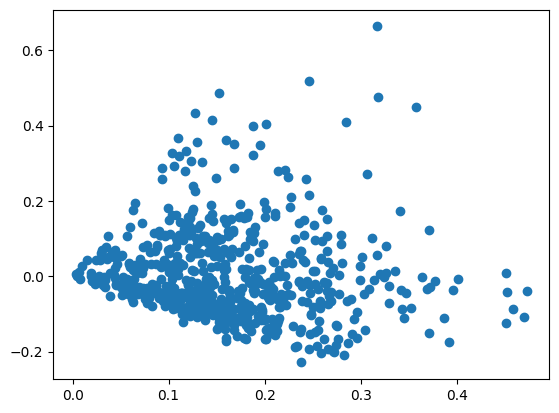

In [13]:
import matplotlib.pyplot as plt

x = []
y = []

for document in truncated_tfidf_matrix:
    x.append(document[0])
    y.append(document[1])

plt.scatter(x, y)
plt.savefig("titres-plot-before-clustering.png")
plt.show()

C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: Fut

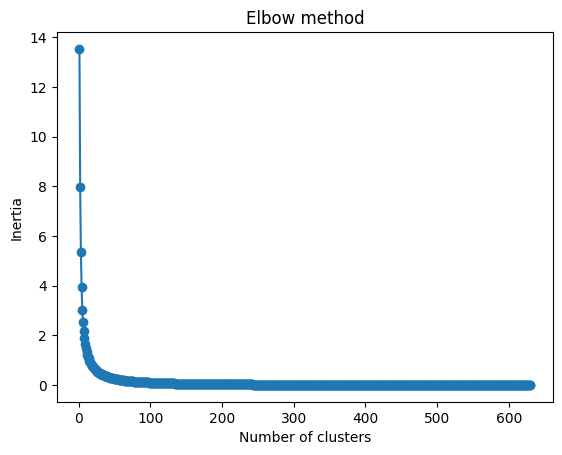

In [14]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1, 631):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 631), inertias, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig("titres-inertia.png")
plt.show()

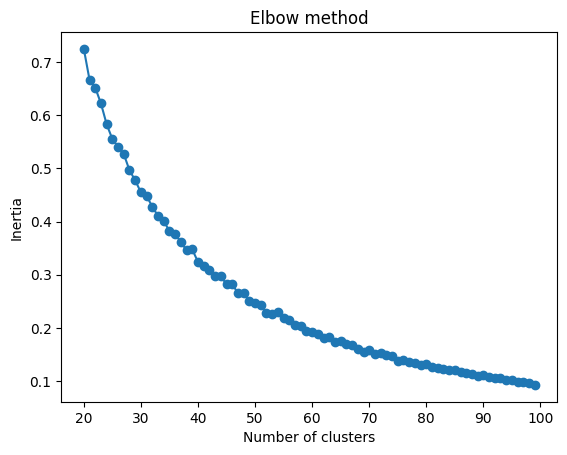

In [15]:
plt.plot(range(20, 100), inertias[19:99], marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: Fut

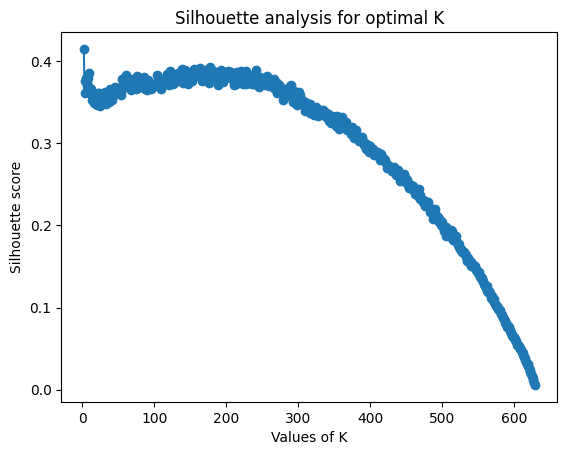

In [16]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for nb_clusters in range(2, 630):
    # on initialise KMeans
    kmeans = KMeans(n_clusters=nb_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

    # calcul du score de silhouette
    silhouette_scores.append(silhouette_score(data, cluster_labels))

plt.plot(range(2, 630), silhouette_scores, marker = 'o')
plt.title('Silhouette analysis for optimal K')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.savefig("titres-silhouette-analysis.png")
plt.show()

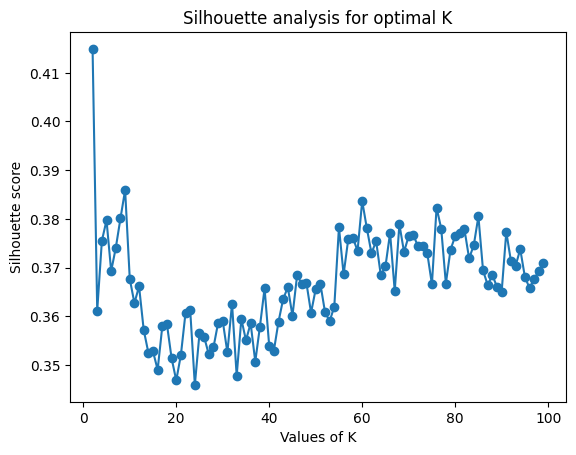

In [17]:
plt.plot(range(2, 100), silhouette_scores[:98], marker = 'o')
plt.title('Silhouette analysis for optimal K')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.show()

In [18]:
np.array(silhouette_scores[1:25]).argmax()+2

8

C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


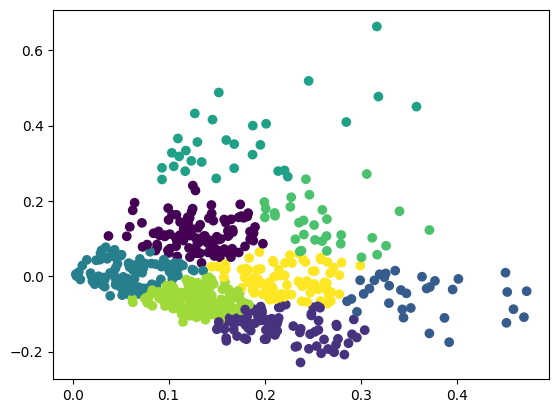

In [19]:
k = np.array(silhouette_scores[1:25]).argmax()+2
kmeans = KMeans(n_clusters = k)
kmeans.fit(data)

plt.scatter(x, y, c = kmeans.labels_)
plt.savefig("titres-plot-after-clustering.png")
plt.show()

In [20]:
clustered_documents = []
for cluster in range(0, k):
    points = np.array(data)[kmeans.labels_ == cluster]
    print("Cluster n°" + str(cluster) + ": (" + str(len(points)) + " documents)")
    document_in_cluster = []
    for point in points:
        index = np.where(truncated_tfidf_matrix == point)[0][0]
        print("Doc ID " + str(index) + " : " + str(point))
        document_in_cluster.append(index)
    print("\n")
    clustered_documents.append(document_in_cluster)

Cluster n°0: (106 documents)
Doc ID 1 : [0.14659218 0.14764311]
Doc ID 16 : [0.18852196 0.11449347]
Doc ID 21 : [0.11556079 0.12008422]
Doc ID 26 : [0.09599986 0.1057487 ]
Doc ID 39 : [0.13338591 0.09270833]
Doc ID 46 : [0.10782913 0.08002336]
Doc ID 47 : [0.17821698 0.1551537 ]
Doc ID 60 : [0.10892823 0.05251131]
Doc ID 63 : [0.13431132 0.03535745]
Doc ID 64 : [0.14406256 0.06359507]
Doc ID 71 : [0.13276365 0.06095928]
Doc ID 77 : [0.12222171 0.05091442]
Doc ID 87 : [0.17960128 0.07939655]
Doc ID 105 : [0.16173812 0.12030198]
Doc ID 116 : [0.10126869 0.11184892]
Doc ID 117 : [0.15789571 0.1507611 ]
Doc ID 118 : [0.03735381 0.10698563]
Doc ID 132 : [0.1730781  0.06309529]
Doc ID 134 : [0.0880031  0.08430186]
Doc ID 144 : [0.18193047 0.15865696]
Doc ID 146 : [0.13105178 0.06177096]
Doc ID 151 : [0.14643378 0.06856261]
Doc ID 170 : [0.12985457 0.08575701]
Doc ID 178 : [0.10015338 0.06207142]
Doc ID 187 : [0.17461162 0.19088308]
Doc ID 197 : [0.15813249 0.07211664]
Doc ID 200 : [0.1074279

## 5. Sélection des meilleurs phrases dans les abstracts des mots clusterisés
- Pre-processing des abstracts
- Identification des mots-clés avec TF-IDF et SDV
- Calcul du score pour chaque phrase dans le cluster
- Sélection de la phrase avec le meilleur score

In [21]:
nb = 0
for cluster in clustered_documents:
    nb += 1
    print("Cluster n°" + str(nb))
    titles = df_hover['Title'].loc[cluster]
    for title in titles:
        print(title)
    print("\n")

Cluster n°1
Subtle Longitudinal Alterations in Env Sequence Potentiate Differences in Sensitivity to Broadly Neutralizing Antibodies following Acute HIV-1 Subtype C Infection.
Infection with HIV-1 subtype D among acutely infected Ugandans is associated with higher median concentration of cytokines compared to subtype A.
A neutralizing antibody target in early HIV-1 infection was recapitulated in rhesus macaques immunized with the transmitted/founder envelope sequence.
HIV-1 infections with multiple founders associate with the development of neutralization breadth.
ADCC-mediating non-neutralizing antibodies can exert immune pressure in early HIV-1 infection.
Limited Evidence for a Relationship between HIV-1 Glycan Shield Features in Early Infection and the Development of Neutralization Breadth.
Broadly neutralizing antibody responses in the longitudinal primary HIV-1 infection Short Pulse Anti-Retroviral Therapy at Seroconversion cohort.
A Novel Sample Selection Approach to Aid the Iden

In [22]:
nb = 0
keywords_weights = []
vectorized_tfidf = []

for cluster in clustered_documents:
    abstracts = df_hover['Abstract'].loc[cluster]
    bag_of_tokens = []
    nb += 1

    #Pre-processing des abstracts
    for abstract in abstracts:
        keywords = []
        keywords.extend([lemmatization(word) for word in nltk.word_tokenize(abstract.strip().lower(), "english") if word.isalpha() and word not in stopwords])
        bag_of_tokens.append(" ".join(keywords))

    # Identification des mots-clés avec TF-IDF et SDV
    bag_of_tokens_dict = {} # conversion en dictionnaire
    for document in range(len(bag_of_tokens)):
        key = "Document " + str(document)
        bag_of_tokens_dict[key] = [bag_of_tokens[document]]
    dataframe = pd.DataFrame(bag_of_tokens_dict) # conversion en dataframe
    tf_idf = TfidfVectorizer()
    tfidf = tf_idf.fit_transform(dataframe.iloc[0])
    tf_idf_sorted = pd.DataFrame(tfidf.toarray().transpose(), tf_idf.get_feature_names_out()) # transformation
    print("Cluster n°" + str(nb))
    svd = TruncatedSVD(n_components=1)
    svd.fit(tf_idf_sorted)
    truncated_tfidf_matrix = svd.transform(tf_idf_sorted)
    svd_df = pd.DataFrame(truncated_tfidf_matrix, tf_idf.get_feature_names_out()).sort_values(by=[0], ascending=False)
    print("SVD:\n" + str(svd_df)[0:20])
    vectorized_tfidf.append(svd_df)
    avg_df = tf_idf_sorted.mean(axis=1).sort_values(ascending=False)
    print("Moyenne:\n" + str(avg_df)[0:20])
    keywords_weights.append(avg_df)

Cluster n°1
SVD:
                         0
infection         0.854598
hiv               0.671667
cell              0.542281
response          0.443371
viral             0.434537
...                    ...
biopsied          0.001908
appropriateness   0.001908
lymphoma          0.001908
lymphoepithelial  0.001908
dearth            0.001908

[2197 rows x 1 columns]
Moyenne:
infection          0.076165
hiv                0.062839
cell               0.046514
neutralization     0.038795
viral              0.037607
                     ...   
appropriateness    0.000355
facility           0.000355
suggestive         0.000355
biopsied           0.000355
cyst               0.000355
Length: 2197, dtype: float64
Cluster n°2
SVD:
                  0
hiv        1.034439
arty       0.790470
infant     0.754435
test       0.713967
ci         0.472052
...             ...
biomarker  0.001657
closer     0.001657
msd        0.001657
closure    0.001657
vls        0.001657

[1916 rows x 1 columns]
Moyenn

In [23]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [24]:
new_abstract = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            sentence_weight = 0
            sentence_keywords = []
            sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
            for word in sentence_keywords:
                if word in keywords_weights[cluster]:
                    sentence_weight += keywords_weights[cluster][word] * keywords_weights[cluster][word]
            if len(sentence_keywords) != 0:
                sentence_weight /= len(sentence_keywords)
            sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentence_cluster = max(sentence_dict, key=sentence_dict.get)
    new_abstract.append(best_sentence_cluster)
' '.join(new_abstract)


'Sixteen men with acute HIV infection and 25 men with chronic HIV infection were studied. Of these, 864 HIV exposed infants had DNA-PCR HIV test results available. Of the participants 838 were HIV negative, 163 had established HIV infection, and 8 had acute HIV infection. 8 (25%) of the patients were HIV seropositive. Eighty-nine women had multiple viral genotypes, while 67 women had a single genotype at primary infection. Five-hundred and fifty-three men (40.6%) were HIV antibody positive and 24 (1.8%) had acute HIV infection; 23 of 24 acutely infected men were from the STD clinic, where they represented 4.5% of all HIV antibody-negative men and 5.0% of all HIV infections. Overall, the HIV prevalence using the HIVSS test was 8.2% (93/1129). Overall, 30 patients (1.0%) had acute HIV infection, 56 (1.8%) had early HIV infection, and 238 (8%) had established HIV infection.'

In [123]:
import re

new_abstract = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            sentence_weight = 0
            if not (bool(re.search(r'(\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|teen|twenty|thirty|fifty|hundred|the).{0,20}( men | women| patients | participants | children | infants )', sentence))):
                sentence_keywords = []
                sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
                for word in sentence_keywords:
                    if word in keywords_weights[cluster]:
                        sentence_weight += keywords_weights[cluster][word] * keywords_weights[cluster][word]
                if len(sentence_keywords) != 0:
                    sentence_weight /= len(sentence_keywords)
            sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentence_cluster = max(sentence_dict, key=sentence_dict.get)
    new_abstract.append(best_sentence_cluster)
' '.join(new_abstract)

'The overall prevalence of HIV infection in this study was 5.35%. For excluding HIV infection (i.e. The overall HIV prevalence among those tested was 56.5% and the prevalence of acute HIV infection was 1.2%. Most HIV-1 infected individuals do not know their infection dates. A general fitness order was observed among 33 HIV-1 isolates; subtype B and D HIV-1 isolates were slightly more fit than the subtype A and dramatically more fit than the 12 subtype C isolates. Acute HIV infection lasts approximately 3 weeks and early HIV infection, which includes acute HIV infection, lasts approximately 7 weeks. Overall, the HIV prevalence using the HIVSS test was 8.2% (93/1129). early HIV infection and LPNT.'

In [26]:
new_abstract = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            sentence_weight = 0
            sentence_keywords = []
            sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
            for word in sentence_keywords:
                if word in vectorized_tfidf[cluster]:
                    sentence_weight += vectorized_tfidf[cluster][word] * vectorized_tfidf[cluster][word]
            if len(sentence_keywords) != 0:
                sentence_weight /= len(sentence_keywords)
            sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentence_cluster = max(sentence_dict, key=sentence_dict.get)
    new_abstract.append(best_sentence_cluster)
' '.join(new_abstract)

'Broadly neutralizing antibodies (bNAbs) for HIV-1 prevention or cure strategies must inhibit transmitted/founder and reservoir viruses. Pre-exposure prophylaxis (PrEP) reduces HIV acquisition risk by >90% and is a critical lever to reduce HIV incidence. Blood donations in South Africa are tested for HIV RNA using individual donation NAT (ID-NAT), allowing detection and rapid antiretroviral therapy (ART) of acute HIV infections. The cystine-cystine chemokine receptor 5 (CCR5) is the primary HIV co-receptor involved in the viral entry process into human cells. Human immunodeficiency virus (HIV) and hepatitis B virus (HBV) are endemic in South Africa while hepatitis C virus (HCV) infection is rare. Human immunodeficiency virus (HIV) partner notification services (HPN), peer mobilization with HIV self-testing, and acute and early HIV infection (AEHI) screening among gay, bisexual, and other men who have sex with men (GBMSM) and transgender women (TGW) were assessed for acceptability, feas

In [124]:
new_abstract = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            if not (bool(re.search(r'(\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|teen|twenty|thirty|fifty|hundred|the).{0,20}( men | women| patients | participants | children | infants )', sentence))):
                sentence_weight = 0
                sentence_keywords = []
                sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
                for word in sentence_keywords:
                    if word in vectorized_tfidf[cluster]:
                        sentence_weight += vectorized_tfidf[cluster][word] * vectorized_tfidf[cluster][word]
                if len(sentence_keywords) != 0:
                    sentence_weight /= len(sentence_keywords)
                sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentence_cluster = max(sentence_dict, key=sentence_dict.get)
    new_abstract.append(best_sentence_cluster)
' '.join(new_abstract)

'Broadly neutralizing antibodies (bNAbs) for HIV-1 prevention or cure strategies must inhibit transmitted/founder and reservoir viruses. Pre-exposure prophylaxis (PrEP) reduces HIV acquisition risk by >90% and is a critical lever to reduce HIV incidence. Blood donations in South Africa are tested for HIV RNA using individual donation NAT (ID-NAT), allowing detection and rapid antiretroviral therapy (ART) of acute HIV infections. The cystine-cystine chemokine receptor 5 (CCR5) is the primary HIV co-receptor involved in the viral entry process into human cells. Human immunodeficiency virus (HIV) and hepatitis B virus (HBV) are endemic in South Africa while hepatitis C virus (HCV) infection is rare. Between April and August 2019, peer mobilizers mobilized clients by offering HIV oral self-tests and immediate clinic referral for clients with AEHI symptoms. To study the structure of human immunodeficiency virus\xa0(HIV)-1 drug resistance (DR) in patients with newly diagnosed infection. Defi

In [64]:
best_sentences_per_cluster = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            sentence_weight = 0
            sentence_keywords = []
            sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
            for word in sentence_keywords:
                if word in keywords_weights[cluster]:
                    sentence_weight += keywords_weights[cluster][word] * keywords_weights[cluster][word]
            if len(sentence_keywords) != 0:
                sentence_weight /= len(sentence_keywords)
            sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentences = pd.Series(sentence_dict).sort_values(ascending=False)[0:10]
    best_sentences_per_cluster.append(best_sentences)

for cluster in best_sentences_per_cluster:
    print(str(cluster) + "\n")

Sixteen men with acute HIV infection and 25 men with chronic HIV infection were studied.                                                                                                                                                  0.002082
The overall prevalence of HIV infection in this study was 5.35%.                                                                                                                                                                          0.002080
A single viral variant is transmitted in the majority of HIV infections.                                                                                                                                                                  0.001722
PwD can accurately determine HIV infection recency.                                                                                                                                                                                       0.001661
TRIM5alphahu levels did not 

In [65]:
best_sentences_per_cluster = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            sentence_weight = 0
            sentence_keywords = []
            sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
            for word in sentence_keywords:
                if word in vectorized_tfidf[cluster]:
                    sentence_weight += vectorized_tfidf[cluster][word] * vectorized_tfidf[cluster][word]
            if len(sentence_keywords) != 0:
                sentence_weight /= len(sentence_keywords)
            sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentences = pd.Series(sentence_dict).sort_values(ascending=False)[0:10]
    best_sentences_per_cluster.append(best_sentences)

for cluster in best_sentences_per_cluster:
    print(str(cluster) + "\n")

Broadly neutralizing antibodies (bNAbs) for HIV-1 prevention or cure strategies must inhibit transmitted/founder and reservoir viruses.                                                                                                                                                                                                        0.0
The role of AnAbs in preventing superinfection and in restricting virus replication is reexamined in the context of recent data.                                                                                                                                                                                                               0.0
In both HIV-infected and 15 uninfected controls, the frequency of activated cells was uniformly distributed among early differentiated (ED; CD45RO(+)CD27(+)), late differentiated (CD45RO(+)CD27(-)), and fully differentiated effector (CD45RO(-)CD27(-)) memory CD4(+) T cells.                                                

In [125]:
best_sentences_per_cluster = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            if not (bool(re.search(r'(\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|teen|twenty|thirty|fifty|hundred|the).{0,20}( men | women| patients | participants | children | infants )', sentence))):
                sentence_weight = 0
                sentence_keywords = []
                sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
                for word in sentence_keywords:
                    if word in keywords_weights[cluster]:
                        sentence_weight += keywords_weights[cluster][word] * keywords_weights[cluster][word]
                if len(sentence_keywords) != 0:
                    sentence_weight /= len(sentence_keywords)
                sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentences = pd.Series(sentence_dict).sort_values(ascending=False)[0:10]
    best_sentences_per_cluster.append(best_sentences)

for cluster in best_sentences_per_cluster:
    print(str(cluster) + "\n")

The overall prevalence of HIV infection in this study was 5.35%.                                                                                                                                                                          0.002080
A single viral variant is transmitted in the majority of HIV infections.                                                                                                                                                                  0.001722
PwD can accurately determine HIV infection recency.                                                                                                                                                                                       0.001661
TRIM5alphahu levels did not change significantly after infection.                                                                                                                                                                         0.001637
During acute HIV infection, 

In [126]:
best_sentences_per_cluster = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            if not (bool(re.search(r'(\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|teen|twenty|thirty|fifty|hundred|the).{0,20}( men | women| patients | participants | children | infants )', sentence))):
                sentence_weight = 0
                sentence_keywords = []
                sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
                for word in sentence_keywords:
                    if word in vectorized_tfidf[cluster]:
                        sentence_weight += vectorized_tfidf[cluster][word] * vectorized_tfidf[cluster][word]
                if len(sentence_keywords) != 0:
                    sentence_weight /= len(sentence_keywords)
                sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentences = pd.Series(sentence_dict).sort_values(ascending=False)[0:10]
    best_sentences_per_cluster.append(best_sentences)

for cluster in best_sentences_per_cluster:
    print(str(cluster) + "\n")

Broadly neutralizing antibodies (bNAbs) for HIV-1 prevention or cure strategies must inhibit transmitted/founder and reservoir viruses.                                                                                                                                                                                                        0.0
CRF02_AG recombinants that contained the pol region of a primary subtype showed higher replicative advantage than other variants.                                                                                                                                                                                                              0.0
We used multiparameter flow cytometry to measure activation, memory maturation, and multiple functions of total and Ag-specific CD4(+) T cells in 14 HIV-1- and CMV- coinfected individuals at 3 and 12 mo post HIV-1 infection.                                                                                                  